In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot as plt

In [2]:
ds= pd.read_csv("C:\\Users\\hp\\Downloads\\datasets\\Iris.csv",index_col='Id')
ds.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
ds.shape

(150, 5)

In [4]:
print(ds.describe())
print(ds.info())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: floa

In [5]:
print(ds.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


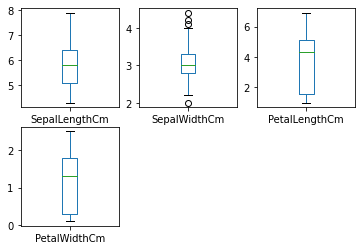

In [6]:
ds.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(2,3))
plt.show()

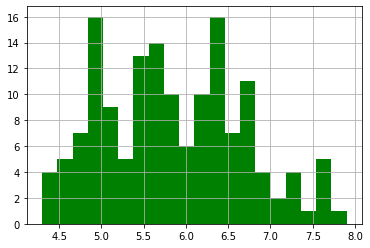

In [7]:
d= ds[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
plt.hist(ds['SepalLengthCm'],bins=20,color='g')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

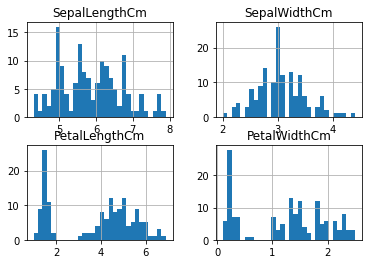

In [8]:
ds.hist( bins=30)
plt.show

In [9]:
import seaborn as sns

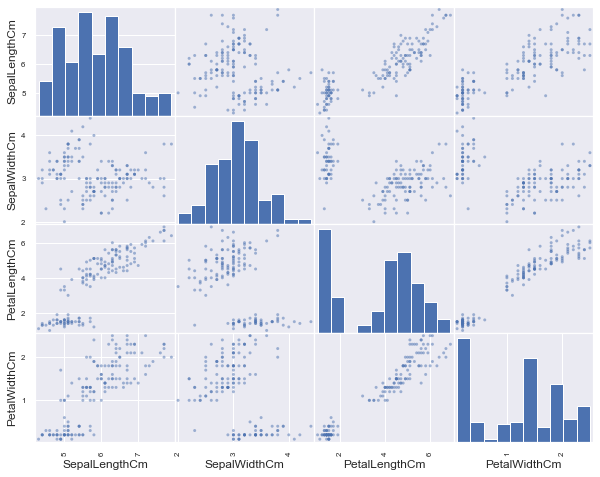

In [10]:
sns.set(rc={'figure.figsize':(10,8)})
scatter_matrix(ds)
plt.show()

<Figure size 720x864 with 0 Axes>

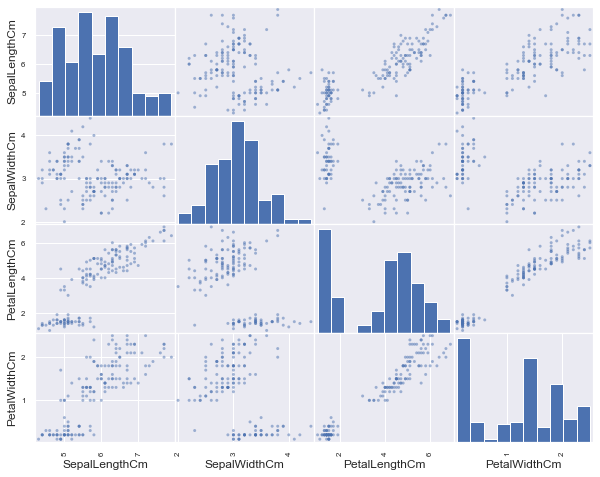

In [11]:
plt.figure(figsize=(10,12))
scatter_matrix(ds)
plt.show()

In [12]:
array= ds.values
x= array[:,0:4]
y= array[:,4]
validation_size=0.20
seed=6
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=validation_size,random_state=seed)

In [13]:
x_train[0:5]

array([[4.8, 3.0, 1.4, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [4.3, 3.0, 1.1, 0.1],
       [6.3, 2.8, 5.1, 1.5]], dtype=object)

In [14]:
y_train[0:5]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [16]:
scoring='accuracy'

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn import model_selection

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
models=[]
models.append(('lr',LogisticRegression()))
models.append(('lda',LinearDiscriminantAnalysis()))
models.append(('nc',KNeighborsClassifier()))
models.append(('dt',DecisionTreeClassifier()))
models.append(('nb',GaussianNB()))
models.append(('svm',SVC()))
results=[]
names=[]
for name, model in models:
    kfold= model_selection.KFold(n_splits=10)
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s:%f(%f)' %(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

lr:0.950000(0.076376)
lda:0.975000(0.038188)
nc:0.958333(0.055902)
dt:0.933333(0.072648)
nb:0.966667(0.055277)
svm:0.950000(0.076376)
